In [3]:
import numpy as np
import matplotlib.pyplot as plt

Lagrange's method for interpolation

For a three degree polynomial 4 datapoints are needed. 


$y(x) = \sum_{i=1}^{n+1} y_{i}(\prod_{j=1,j≠i}^{n+1}\Large\frac{(x-x_{j})}{(x_{i}-x_{j})})$ 

intuition: https://math.stackexchange.com/questions/81044/is-there-some-intuition-for-lagrange-interpolation-formula

In [4]:
x = [0, 20, 40, 60, 80, 100]
y = [26.0, 48.6, 61.6, 71.2, 74.8, 75.2]


m = len(x)
n = m-1
yp = 0
xp = 50
for i in range(n+1):
    L = 1
    for j in range(n+1):
        if j!=i:
            L*=   (xp - x[j])/(x[i]-x[j])
    yp+=y[i]*L

print(xp,yp)

50 66.94765625


Lagrange interpolation for Volatility smile

https://quant.stackexchange.com/questions/66156/difference-of-polynomial-interpolation-for-volatility-smile

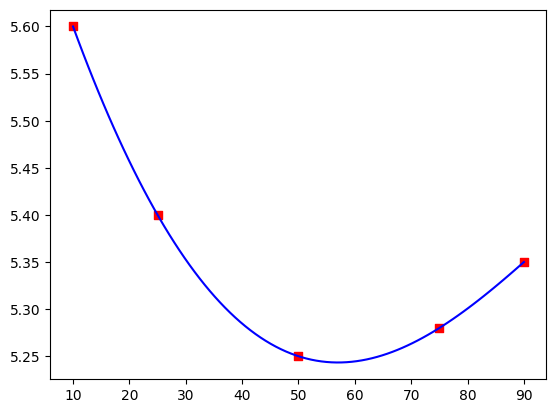

In [5]:
from scipy.interpolate import lagrange

x = np.array([10, 25, 50, 75, 90]) #LIST OF DELTA
y = np.array([5.60, 5.40, 5.25, 5.28, 5.35])

interpolation = lagrange(x, y)
xpol = np.linspace(x[0], x[4], 90)
ypol_lag = interpolation(xpol)
plt.scatter(x, y, marker='s', c='r')
plt.plot(xpol, ypol_lag, "b")
plt.show()

### Newton's interpolation method (Divided-Differences)
 
Use data points to get a curve of the form below: 
 
$ y(x) = a_{0} + (x-x_{1})a_{1} + (x-x_{1})(x-x_{2})a_{2} + ... + (x-x_{1})(x-x_{2})..(x-x_{n})a_{n} $

Finding all $a_{i}$ via reccursive polynomial generation method

method: https://math.stackexchange.com/a/2337187

In [6]:
x = [0.0,1.5,2.8,4.4,6.1,8.0]
y = [0.0,0.9,2.5,6.6,7.7,8.0]
n = len(x) -1

Dy = np.zeros((n+1,n+1))

Dy[:,0] = y
for j in range(n):
    for i in range(j+1,n+1):
        Dy[i,j+1] = (Dy[i,j]-Dy[j,j])/(x[i]-x[j])

xp = 1.5
yp = Dy[0,0]
for i in range(n):
    xprod = 1
    for j in range(i+1):
        xprod *= xp - x[j]
    yp += xprod * Dy[i+1,i+1]

print(xp,yp)

1.5 0.8999999999999999


In [9]:
from scipy.interpolate import interp1d,lagrange
x = [0, 20, 40, 60, 80, 100]
y = [26.0, 48.6, 61.6, 71.2, 74.8, 75.2]

f = interp1d(x,y)

In [10]:
f(50)

array(66.4)

In [11]:
f = interp1d(x,y,'quadratic')

In [12]:
f(50)

array(66.95208333)

In [ ]:
f = interp1d(x,y,'cublic')